<a href="https://colab.research.google.com/github/ADRIFAOZAN/UAS-AI/blob/main/Klasifikasi_Obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Obesitas menggunakan KNN

Dibuat oleh : adri_faozan

In [4]:
import pandas as pd
from google.colab import files
filenya = files.upload()

Saving Obesity Classification.csv to Obesity Classification (2).csv


In [53]:
fdata="https://raw.githubusercontent.com/ADRIFAOZAN/UAS-AI/refs/heads/main/dataset/Obesity%20Classification.csv"

df = pd.read_csv(fdata)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [ ]:
#Cek Jumlah data, jumlah duplikasi, dan jumlah setelah dihapus baris duplikasi
print(f"Jumlah data : {df.shape[0]}")
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}")
#Drop duplicated
df.drop_duplicates(inplace=True)
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")

In [56]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [61]:
from sklearn.model_selection import train_test_split
y=df.Label
X=df.drop("Label", axis=1)

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True, stratify=y,random_state=12)
print(f"Jumlah data train : {len(x_train)}")
print(f"Jumlah data test : {len(x_test)}")

Jumlah data train : 86
Jumlah data test : 22


In [63]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [65]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)
scl = StandardScaler()
x_train_scl = scl.fit_transform(x_train)
x_test_scl = scl.transform(x_test)


In [66]:
x_train

,ID,Age,Height,Weight,BMI,Gender_Male
50,53,77,180,75,24.2,True
67,70,61,120,75,25.0,False
69,72,20,160,30,13.3,False
99,102,42,200,30,13.3,True
107,110,31,190,20,8.3,True
...,...,...,...,...,...,...
65,68,51,130,65,22.7,False
24,26,88,190,100,31.2,True
6,7,55,200,110,34.2,True
86,89,28,150,25,10.0,False


In [67]:
x_train_scl

array([[-0.16627371,  1.37595437,  0.40691138,  0.51003937,  0.46405609,
         0.91092658],
       [ 0.4003747 ,  0.67446744, -1.76890489,  0.51003937,  0.57557218,
        -1.09778331],
       [ 0.46703921, -1.12309281, -0.31836071, -1.10126868, -1.05535075,
        -1.09778331],
       [ 1.46700699, -0.15854828,  1.13218346, -1.10126868, -1.05535075,
         0.91092658],
       [ 1.73366506, -0.64082054,  0.76954742, -1.45933713, -1.75232636,
         0.91092658],
       [-0.76625438, -0.29007708,  0.76954742,  1.22617628,  0.85436243,
         0.91092658],
       [-1.19957375,  0.98136798,  0.22559335,  0.6890736 ,  0.61739072,
         0.91092658],
       [-0.33293501,  0.27988105, -1.40626885,  0.51003937,  0.57557218,
        -1.09778331],
       [ 1.63366829, -1.29846454, -0.31836071, -1.81740559, -2.36566489,
        -1.09778331],
       [ 1.66700055, -1.07924987,  0.40691138, -1.63837136, -2.12869319,
         0.91092658],
       [ 1.23368118,  0.54293865, -1.76890489, -0.

In [68]:
y_train

,Label
50,Normal Weight
67,Overweight
69,Underweight
99,Underweight
107,Underweight
...,...
65,Normal Weight
24,Obese
6,Obese
86,Underweight


In [74]:
lbl_encoder = LabelEncoder()
y_train_enc = lbl_encoder.fit_transform(y_train)
y_test_enc = lbl_encoder.transform(y_test)

In [75]:
y_train_enc

array([0, 2, 3, 3, 3, 2, 0, 2, 3, 3, 3, 0, 0, 3, 3, 0, 1, 2, 3, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 2, 0, 3, 1, 3, 3, 3, 0, 2, 2, 3, 1, 3, 3, 3, 3,
       2, 2, 1, 3, 3, 0, 1, 3, 3, 1, 3, 0, 3, 3, 2, 3, 0, 0, 3, 2, 0, 3,
       0, 1, 0, 2, 2, 3, 1, 3, 3, 2, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0])

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scl, y_train_enc)

KNeighborsClassifier()

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [79]:
knn_predictions = knn_classifier.predict(x_test_scl)
knn_accuracy = accuracy_score(y_test_enc, knn_predictions)

print(f'KNN accuracy: {knn_accuracy:.2f}')

KNN accuracy: 0.77


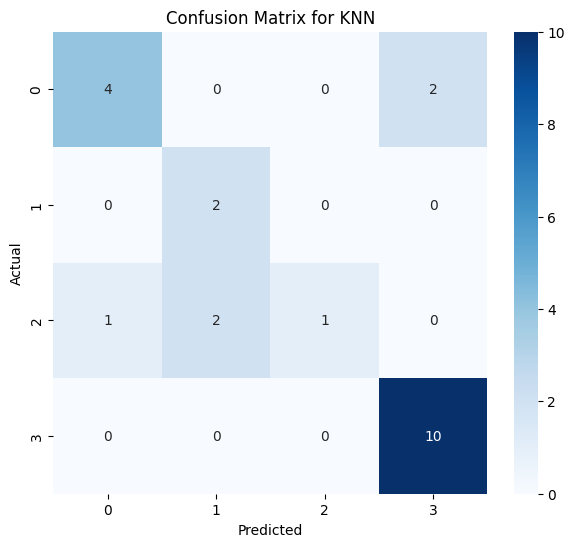

In [83]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_enc, knn_predictions)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
knn=KNeighborsClassifier(n_neighbors=5)
score_sc=cross_val_score(knn,x_train_scl,y_train_enc,cv=5)
print(score_sc)
print(f"Rata score dengan 5 fold : {score_sc.mean()}")

[0.83333333 0.82352941 0.82352941 0.70588235 0.88235294]
Rata score dengan 5 fold : 0.8137254901960784


In [86]:
n_=range(1,51,2)
train,test=[],[]
for n in n_:
  knn=KNeighborsClassifier(n_neighbors=n)
  knn.fit(x_train_scl,y_train_enc)
  train.append(knn.score(x_train_scl,y_train_enc))
  test.append(knn.score(x_test_scl,y_test_enc))

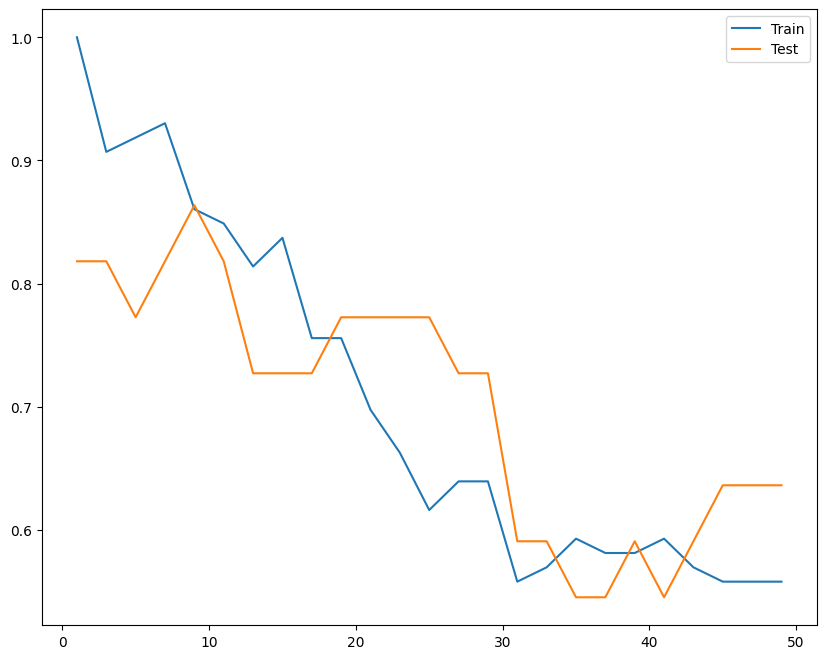

In [87]:
plt.figure(figsize=(10,8))
plt.plot(n_,train, label='Train')
plt.plot(n_,test, label='Test')

plt.legend()
plt.show()

In [89]:
import numpy as np

print(f"Max Test Score adalah {np.max(test)}")
print(f"K Neighboard terbaik adalah {n_[np.argmax(test)]}")

Max Test Score adalah 0.8636363636363636
K Neighboard terbaik adalah 9
